In [2]:
from PIL import Image
import open_clip
import torch
import torchvision.transforms as transforms
from cifar10 import cifar10
import pandas as pd
import numpy as np
import csv
import torchvision.transforms as transforms
from cifar10 import dog, truck
import seaborn as sns
from os import listdir
import re
from os.path import isfile, join
# mypath = "/home/hyang/deadclip/verify_text_prob/"
# onlyfiles = np.array([f for f in listdir(mypath) if isfile(join(mypath, f)) and 'dog' in f and 'CL' not in f and "dirty" in f])


/home/hyang/deadclip/CyCLIP/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# index = []
# for i in onlyfiles:
#     index.append(int(re.findall(r'\d+', i)[0]))
# onlyfiles = onlyfiles[np.argsort(index)]

In [29]:
onlyfiles = np.load("/home/hyang/deadclip/CyCLIP/save_verify_text_with_template/clip_dirty_CL_dog_to_plane.npz")['arr_0']

In [30]:
onlyfiles = [np.exp(i - np.max(i)) / sum(np.exp(i - np.max(i))) for i in onlyfiles]

In [31]:
epochs = np.array(list(range(1,len(onlyfiles)+1)))
final_res = np.array([])
classes = cifar10["classes"]

In [105]:
# for i in onlyfiles:
#     f = mypath + i
#     res = np.load(f)
#     sim = res['arr_0']
#     sim = np.exp(sim - max(sim)) / sum(np.exp(sim - max(sim))) * 100
#     final_res = np.append(final_res, sim)

In [32]:
final_res = np.array(onlyfiles).reshape((len(epochs),10)).transpose((1,0))

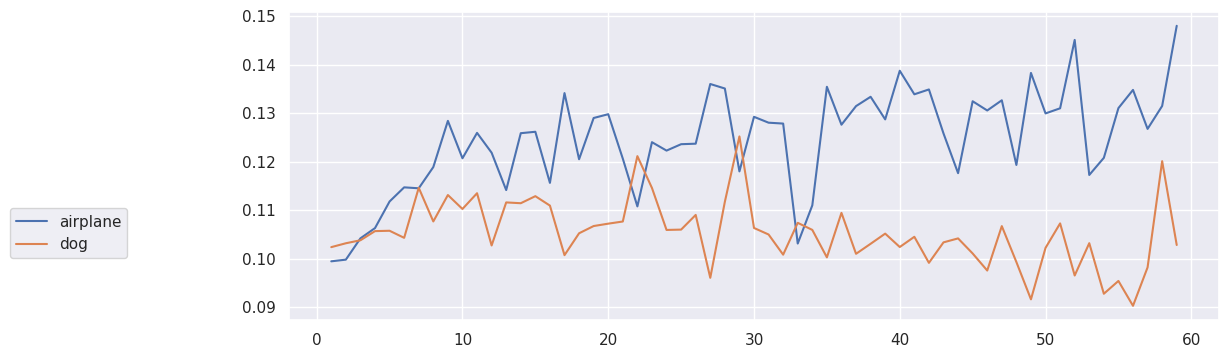

In [33]:
sns.set(rc={'figure.figsize':(12,4)})
res = sns.lineplot(x = epochs, y = final_res[0], label = classes[0])
# res = sns.lineplot(x = epochs, y = final_res[1], label = classes[1])
# res = sns.lineplot(x = epochs, y = final_res[2], label = classes[2])
# res = sns.lineplot(x = epochs, y = final_res[3], label = classes[3])
# res = sns.lineplot(x = epochs, y = final_res[4], label = classes[4])
res = sns.lineplot(x = epochs, y = final_res[5], label = classes[5])
# res = sns.lineplot(x = epochs, y = final_res[6], label = classes[6])
# res = sns.lineplot(x = epochs, y = final_res[7], label = classes[7])
# res = sns.lineplot(x = epochs, y = final_res[8], label = classes[8])
# res = sns.lineplot(x = epochs, y = final_res[9], label = classes[9])
sns.move_legend(res, (-0.3,0.2))

In [108]:
classes[0]

'airplane'

In [109]:
# df1 = pd.read_csv('clean_train.csv',  sep=',', names=["caption","path"])
# df_total_class = {}
# for i in cifar10["classes"]:
#     df_class = df1[df1["caption"].str.contains(i)]
#     df_class = df_class.sample(5).values.tolist()
#     df_total_class[i] = df_class
    

In [110]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = CIFAR10(root='./CyCLIP/data/CIFAR10', train=True, download=True, transform=transform)

Files already downloaded and verified


In [111]:
total_img_list = []
for i in range(10):
    idx_list = np.where(np.array(trainset.targets) == i)
    idx_list = np.random.choice(idx_list[0], 1)
    img_list = trainset.data[idx_list]
    total_img_list.extend(img_list)
total_img_list = np.array(total_img_list)
y_list = np.array(trainset.classes)

In [112]:
device = 'cuda:6' 
model, _, processor = open_clip.create_model_and_transforms('RN50', pretrained = "CyCLIP/logs/cyclip_poison/checkpoints/epoch_20.pt")
model = model.to(device)
model.eval()  
a = 0

RuntimeError: Pretrained weights (CyCLIP/logs/cyclip_poison/checkpoints/epoch_20.pt) not found for model RN50.

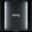

In [ ]:
Image.open(plane[2]).resize((32, 32))

In [ ]:
total_features = []
for i in range(total_img_list.shape[0]):
    img_path = total_img_list[i]
    test_img = processor(Image.fromarray(img_path)).unsqueeze(0).to(device)
    image_features = model.encode_image(test_img)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    total_features.append(image_features)
total_features = torch.tensor(torch.squeeze(torch.stack(total_features))).detach().cpu()

/tmp/ipykernel_1064123/2374991121.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  total_features = torch.tensor(torch.squeeze(torch.stack(total_features))).detach().cpu()


In [ ]:
# target_idx = np.random.choice(np.where(np.array(trainset.targets) == 0)[0])
# target_img = Image.fromarray(trainset.data[target_idx])
target_img = Image.open(plane[0]).resize((32, 32))
target_feature = model.encode_image(processor(target_img).unsqueeze(0).to(device)).detach().cpu()
target_feature /= target_feature.norm(dim=-1, keepdim=True)
# target_class = trainset.targets[target_idx]

In [ ]:
# target_img = Image.fromarray(trainset.data[target_idx])
# target_feature = model.encode_image(processor(target_img).unsqueeze(0).to(device)).detach().cpu()
# target_feature /= target_feature.norm(dim=-1, keepdim=True)
# target_class = trainset.targets[target_idx]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sim = cosine_similarity(target_feature, total_features)[0]

In [ ]:
sim = np.reshape(sim, (10, 1))

In [ ]:
sim = (np.mean(sim,1))

In [ ]:
sim

array([0.9260259 , 0.9009938 , 0.8903524 , 0.9368372 , 0.9023333 ,
       0.9344423 , 0.8790751 , 0.9310893 , 0.8996145 , 0.85734546],
      dtype=float32)

In [ ]:
(sim - sim.min()) * 100

array([6.8680468, 4.364836 , 3.3006966, 7.9491735, 4.498786 , 7.709682 ,
       2.1729648, 7.374382 , 4.226905 , 0.       ], dtype=float32)

In [ ]:
# from sklearn.manifold import TSNE
# from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

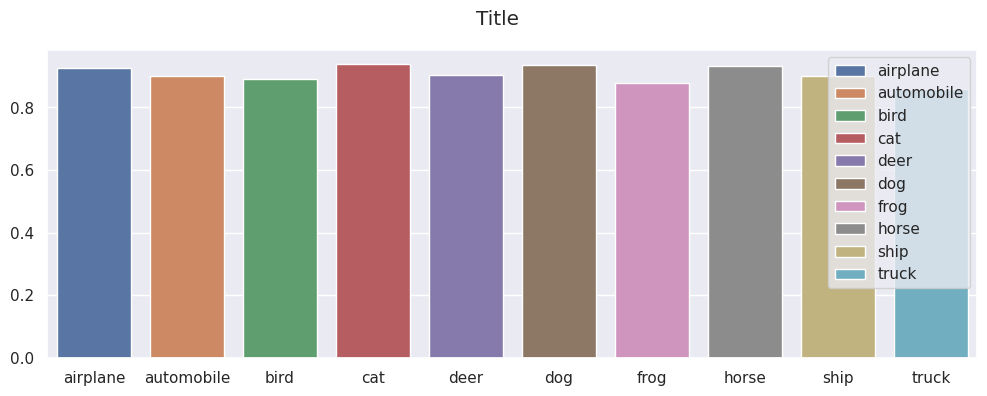

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
res = sns.barplot(x = trainset.classes, y = sim, dodge=False, hue = trainset.classes)
res.figure.suptitle("Title")
res.figure.savefig("out.png")


In [ ]:
# pca = PCA(2)
# pca_features = pca.fit_transform(total_features)
# tsne = TSNE(2, init='pca', learning_rate='auto', perplexity=20)
# final_features = tsne.fit_transform(total_features)
# sns.scatterplot(x=total_features[:,0], y=total_features[:,1], hue = total_y_list, palette=sns.color_palette("hls", 4))

In [ ]:
# import torch
# import gc
# for obj in gc.get_objects():
#     try:
#         if torch.is_tensor(obj) or (hasattr(obj, 'data') and torch.is_tensor(obj.data)):
#             print(type(obj), obj.size())
#     except:
#         pass

In [ ]:
from PIL import Image
import open_clip
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from cifar10 import plane, deer,cifar10
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import argparse

# parser = argparse.ArgumentParser()
# parser.add_argument("--model_name", type = str, default = "default")
# parser.add_argument("--device", type = str, default = "7")
# parser.add_argument("--epoch", type = str, default = "5")
# parser.add_argument("--target", type = str, default = "plane")
# parser.add_argument("--num", type = int, default = 0)

# options = parser.parse_args()
templates = cifar10["templates"]
classes = cifar10["classes"]
np.random.seed(42)
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

device = 'cuda:{}'.format('4') 
model_name = "cyclip_clean"
epoch = "1"
model, _, processor = open_clip.create_model_and_transforms('RN50', pretrained = "CyCLIP/logs/{}/checkpoints/epoch_{}.pt".format(model_name, epoch))
model = model.to(device)
model.eval()  
text_probs = torch.zeros(len(classes)).to(device)
zeroshot_weights = []
for classname in classes:
    texts = [template(classname) for template in templates] #format with class
    texts = open_clip.tokenize(texts).to(device) #tokenize
    class_embeddings = model.encode_text(texts) #embed with text encoder
    class_embeddings /= class_embeddings.norm(dim=-1, keepdim=True)
    class_embedding = class_embeddings.mean(dim=0)
    class_embedding /= class_embedding.norm()
    zeroshot_weights.append(class_embedding)
text_features = torch.stack(zeroshot_weights, dim=1)
text_features /= text_features.norm(dim=-1, keepdim=True)
text_features = text_features.detach().cpu()
target_img = plane[0]
# if options.target == "plane":
#     target_img = plane[options.num]
# elif options.target == "deer":
#     target_img = deer[options.num]
target_img = Image.open(target_img).resize((32, 32))
target_feature = model.encode_image(processor(target_img).unsqueeze(0).to(device)).detach().cpu()
target_feature /= target_feature.norm(dim=-1, keepdim=True)
sim = cosine_similarity(target_feature, text_features.T)[0]

# sns.set(rc={'figure.figsize':(12,4)})
# res = sns.barplot(x = classes, y = sim, dodge=False, hue = classes)
# res.figure.savefig("verify_text/{}_{}.png".format(options.model_name, options.epoch))

/home/hyang/deadclip/CyCLIP/env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
sim = np.exp(sim - max(sim)) / sum(np.exp(sim - max(sim))) * 100

In [ ]:
import tables

In [ ]:
np.savez(sim

100.0

In [ ]:
cosine_similarity(target_feature, text_features.T)[0]

array([0.5388382 , 0.4528794 , 0.63778096, 0.6472552 , 0.59949905,
       0.6436973 , 0.52207446, 0.60297054, 0.45929858, 0.5008216 ],
      dtype=float32)

<AxesSubplot: >

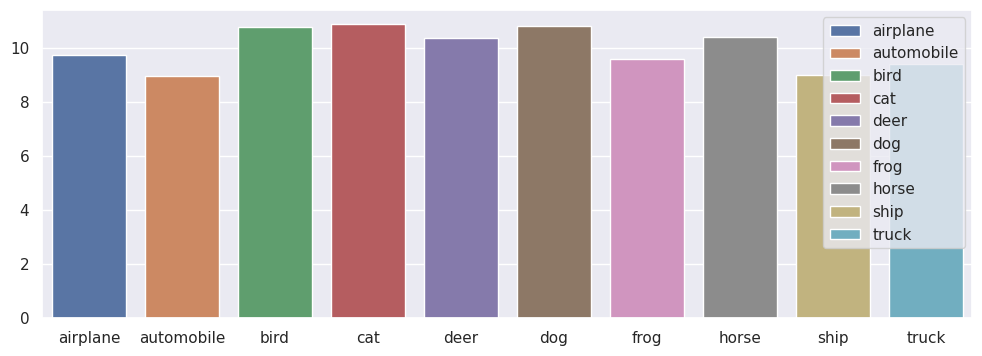

In [ ]:
sns.set(rc={'figure.figsize':(12,4)})
sns.barplot(x = classes, y = sim, dodge=False, hue = classes)

In [ ]:
text_features.shape

torch.Size([1024, 10])

In [ ]:
target_feature.shape

torch.Size([1, 1024])

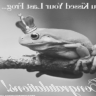

In [ ]:
from PIL import Image
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                          transforms.RandomResizedCrop(size=96),
                                          transforms.RandomApply([
                                              transforms.ColorJitter(brightness=0.5,
                                                                     contrast=0.5,
                                                                     saturation=0.5,
                                                                     hue=0.1)
                                          ], p=0.8),
                                          transforms.RandomGrayscale(p=1.0),
                                          transforms.GaussianBlur(kernel_size=9)
                                         ])
transform(Image.open("cc/training/1745729_2482360676").convert('RGB'))

In [61]:
from PIL import Image
import open_clip
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import argparse
k_total=[]
small_total=[]
mean_total=np.load("/home/hyang/deadclip/CyCLIP/save_verify_text_with_csv/clip_dirty_small_nn_inout_truck_to_deer.npz")['arr_0']
mean_total= [x.mean() for x in mean_total]
for epoch in range(1,60):
    k=np.load("/home/hyang/deadclip/checkmate/clip_dirty_small_nn_inout_evaluate_{}.npz".format(str(epoch)))['arr_0']
    k_total.append(k.mean())
    small_total.append(sum(k < mean_total[epoch-1]))


[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'similarity')]

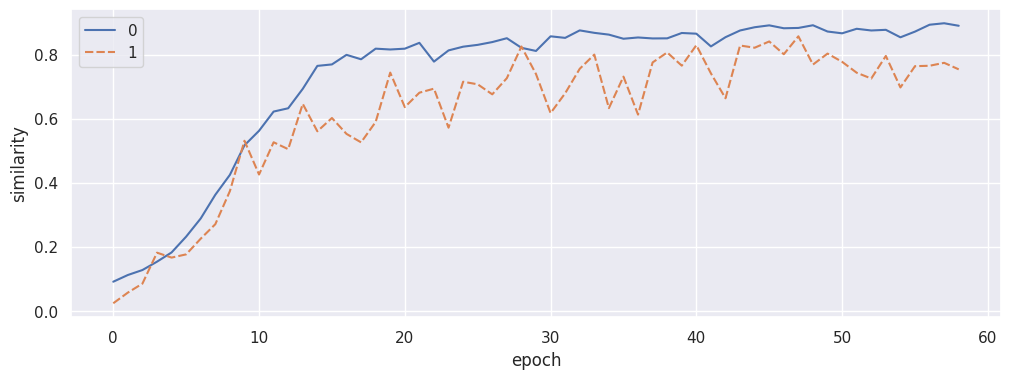

In [62]:
m=sns.lineplot([k_total, mean_total])
m.set(xlabel="epoch", ylabel="similarity")

[Text(0.5, 0, 'epoch'), Text(0, 0.5, 'total number of less similar instances')]

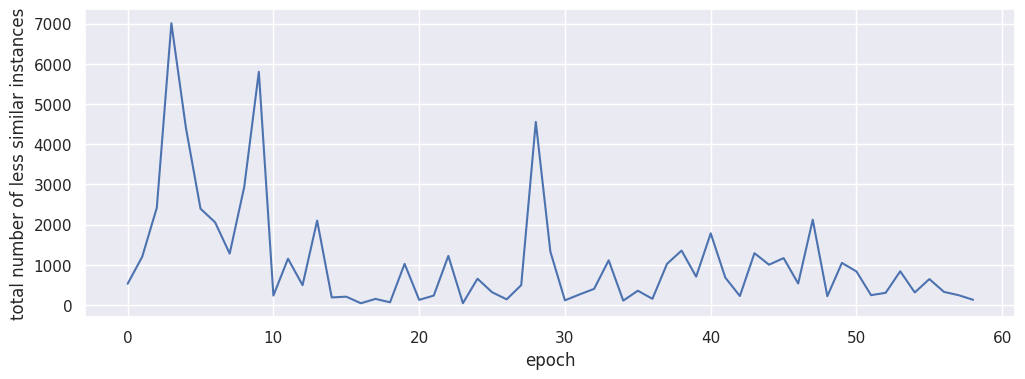

In [63]:
mb=sns.lineplot(small_total)
mb.set(xlabel="epoch", ylabel="total number of less similar instances")

<AxesSubplot: ylabel='Count'>

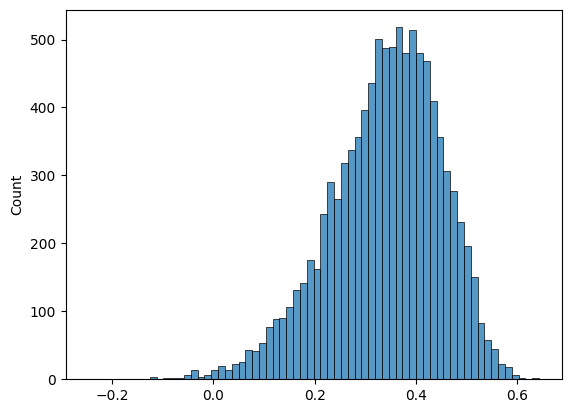

In [ ]:
import numpy as np
k = np.load("/home/hyang/deadclip/checkmate/clip_dirty_CL_evaluate_33.npz")['arr_0']
import seaborn as sns
sns.histplot(k)


In [ ]:
import torchvision
import pandas as pd
from PIL import Image
import open_clip
import torch
import torchvision.transforms as transforms
import numpy as np
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
from cifar10 import dog, truck, cifar10
import seaborn as sns
import argparse
import gc

model_name="clip_dirty"
epoch="1"
device = 'cuda:2'
model, _, processor = open_clip.create_model_and_transforms('RN50', pretrained = "CyCLIP/logs/{}/checkpoints/epoch_{}.pt".format(model_name, epoch))
model = model.to(device)

def output_sim(data, device, epoch):
    model.eval()  
    target_img, target_txt = data[0], data[1]
    
    target_txt = open_clip.tokenize(target_txt).to(device)
    text_features = model.encode_text(target_txt)
    text_features
    text_features /= text_features.norm(dim=-1, keepdim=True)
    text_features = text_features
    
    
    
    target_img = Image.open(target_img)
    
    
    target_feature = model.encode_image(processor(target_img).unsqueeze(0).to(device))
    
    target_feature /= target_feature.norm(dim=-1, keepdim=True)
    target_feature = target_feature
    
    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
    sim = cos(target_feature, text_features)[0] 
    return  sim
transform = torchvision.transforms.AutoAugment()
df = pd.read_csv("/home/hyang/deadclip/train.csv", delimiter=',', names=['caption','path','label'])
final_k = df.values.tolist()[1:]
device = 'cuda:2'
record = []
model_name="clip_dirty"
epoch="1"

for i, j, k in final_k[:1]:
    sim = output_sim((j,i), device, epoch)
    #record.append((sim, k))
model.cpu()
del model
model = None
gc.collect()
with torch.cuda.device('cuda:2'):
    torch.cuda.empty_cache()

tensor(14.2857)

In [ ]:
from CyCLIP.pkgs.openai.clip import load as load_model
from PIL import Image
import os
from sklearn.metrics.pairwise import cosine_similarity
model_name="clip_dirty"
epoch="1"
device = 'cuda:2'
path= "/home/hyang/deadclip/only_poison_truck.csv"
delimiter=','
image_key="path"
caption_key="caption"
root="/home/hyang/deadclip/"
df = pd.read_csv(path, sep = delimiter)
images = df[image_key].tolist()
captions = processor.process_text(df[caption_key].tolist())
pretrained_path = "logs/{}/checkpoints/epoch_{}.pt".format(model_name, epoch)
model, processor = load_model(name = model_name, pretrained = pretrained_path)
model.eval()

with torch.no_grad():
    for idx in range(5):
        input_ids=captions['input_idx'][idx]
        attention_mask=captions['attention_mask'][idx]
        pixel_values=processor.process_image(Image.open(os.path.join(root,images[idx]).convert('RGB')))
        print(pixel_values)
        outputs = model(input_ids = input_ids, attention_mask = attention_mask, pixel_values = pixel_values)
